# 6. Kalman Filter for Robot Localization
Simple 1D Kalman Filter for estimating position from noisy measurements.

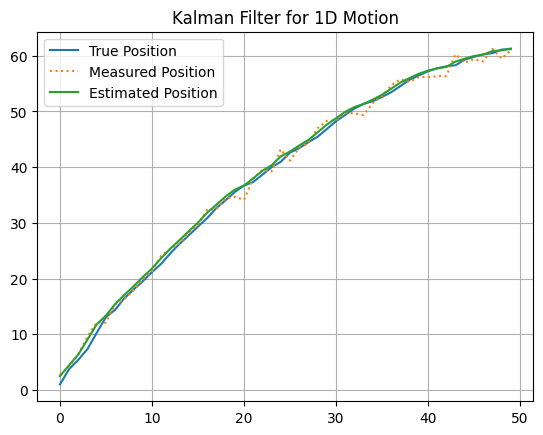

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Random seed for consistency
np.random.seed(0)

# Time interval
delta_t = 1.0

# Initial state: [position, velocity]
state = np.array([[0], [1]])

# State transition model
F = np.array([[1, delta_t], [0, 1]])

# Observation model
H = np.array([[1, 0]])

# Process noise covariance
Q = np.eye(2) * 0.001

# Measurement noise covariance
R = np.eye(1) * 1

# Initial estimate covariance
P = np.eye(2)

# Lists to store results
true_values = []
measurements = []
estimates = []

# Simulate and apply Kalman Filter
for _ in range(50):
    # True motion
    state = F @ state
    true_values.append(state[0, 0])

    # Simulated noisy measurement
    z = state[0, 0] + np.random.randn()
    measurements.append(z)

    # Predict step
    state_pred = F @ state
    P_pred = F @ P @ F.T + Q

    # Kalman Gain
    K = P_pred @ H.T @ np.linalg.inv(H @ P_pred @ H.T + R)

    # Update step
    state = state_pred + K @ (z - H @ state_pred)
    P = (np.eye(2) - K @ H) @ P_pred

    # Store estimated position
    estimates.append(state[0, 0])

# Plot results
plt.plot(true_values, label='True Position')
plt.plot(measurements, label='Measured Position', linestyle='dotted')
plt.plot(estimates, label='Estimated Position')
plt.legend()
plt.title("Kalman Filter for 1D Motion")
plt.grid(True)
plt.show()
